In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# convert to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# convert the string representation of list to actual list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# selecting data analyst job and country is United States
df_DA_US = df[(df['job_title_short'] == "Data Analyst") & (df['job_country'] == "United States")].copy()

# drop the NaN value
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

<Axes: >

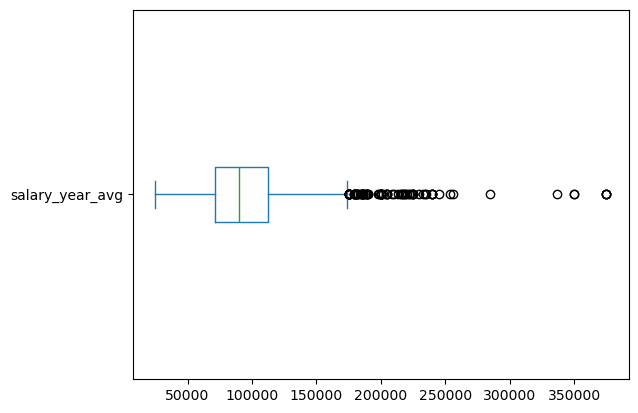

In [3]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x251abf19590>,
 'caps': [<matplotlib.lines.Line2D at 0x251abf19810>,
 'boxes': [<matplotlib.lines.Line2D at 0x251abf19450>],
 'medians': [<matplotlib.lines.Line2D at 0x251abf19a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x251abf19bd0>],
 'means': []}

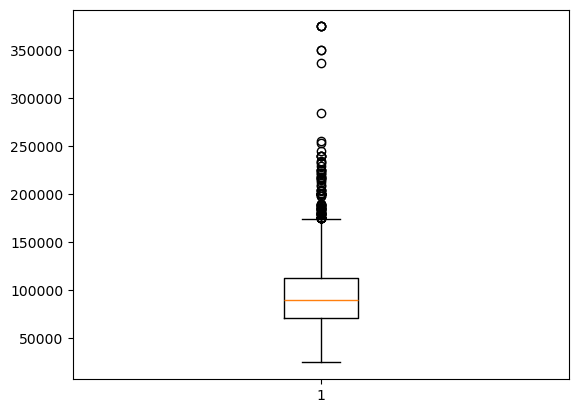

In [6]:
plt.boxplot(df_DA_US['salary_year_avg'])

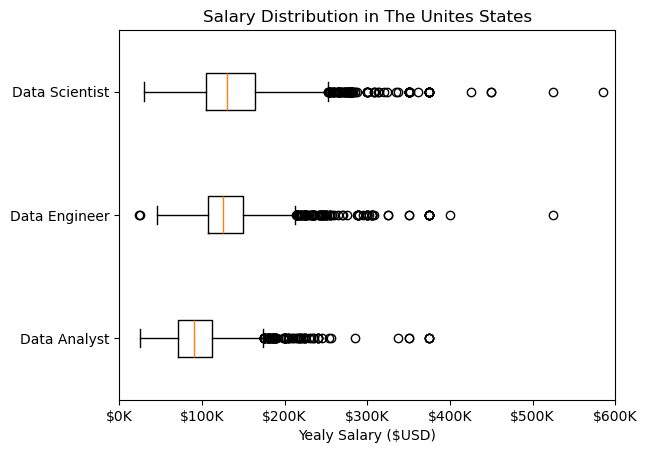

In [4]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter data to appropriate job_titles
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == "United States")].copy()

# remove NaN values
df_US = df_US.dropna(subset='salary_year_avg')

jobs_lists = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(jobs_lists, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution in The Unites States')
plt.xlabel('Yealy Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

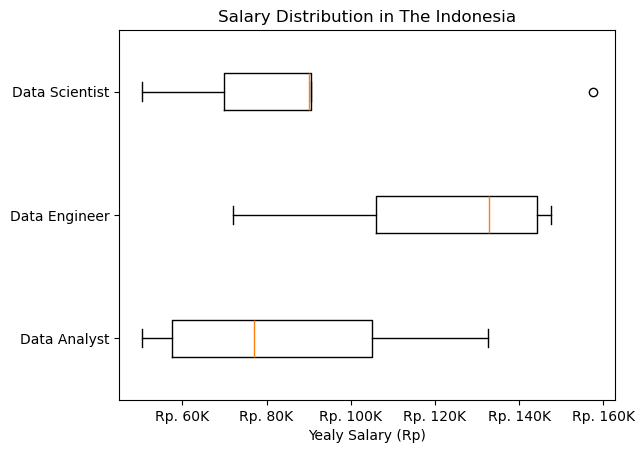

In [ ]:
# filter data to appropriate job_titles
df_ID = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == "Indonesia")].copy()

# remove NaN values
df_ID = df_ID.dropna(subset='salary_year_avg')

jobs_lists = [df_ID[df_ID['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(jobs_lists, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution in The Indonesia')
plt.xlabel('Yealy Salary (Rp)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'Rp. {int(x/1000)}K'))
plt.show()

In [34]:
jobs_lists

[109        89000.0
 180        90250.0
 410       133285.0
 988        62623.0
 1413       71300.0
             ...   
 782637     70000.0
 782798    111175.0
 783588    125000.0
 783866    115000.0
 784882     87500.0
 Name: salary_year_avg, Length: 4350, dtype: float64,
 92        120000.0
 146       129500.0
 307       185000.0
 339       195000.0
 380        97500.0
             ...   
 783111    125000.0
 784102     90000.0
 784191    217500.0
 785624    139216.0
 785641    150000.0
 Name: salary_year_avg, Length: 2915, dtype: float64,
 100       228222.0
 116       114000.0
 257       103128.0
 450       157500.0
 1257       70700.0
             ...   
 785324    234500.0
 785488    115000.0
 785563    136400.0
 785648    221875.0
 785692    157500.0
 Name: salary_year_avg, Length: 4553, dtype: float64]

In [ ]:
plt.boxplot()

92        120000.0
100       228222.0
109        89000.0
116       114000.0
146       129500.0
            ...   
785563    136400.0
785624    139216.0
785641    150000.0
785648    221875.0
785692    157500.0
Name: salary_year_avg, Length: 11818, dtype: float64